In [1]:
import nilearn
from nilearn import datasets
import os
import numpy as np
import matplotlib.pyplot as plt 
from nibabel import load

In [2]:
from nilearn import input_data
from nilearn import plotting, image
from nilearn.input_data import NiftiLabelsMasker

In [3]:
from nibabel.testing import data_path
import nibabel as nib

In [4]:
import nitime.analysis as nta
import nitime.fmri.io as io

In [5]:
timeseries_file = os.path.join(data_path, '/data/henry7/imagery/piloting/resting/s05/resting/timeseries/target/rest_01_smooth_trans_masked.nii.gz')

In [6]:
img = nib.load(timeseries_file)

In [7]:
data = img.get_data

In [8]:
seed_data = nib.load('/data/henry7/imagery/piloting/surfaces/resting_state_ROI/M1_ROI/M1_lh.nii.gz').get_data()

In [9]:
%matplotlib inline

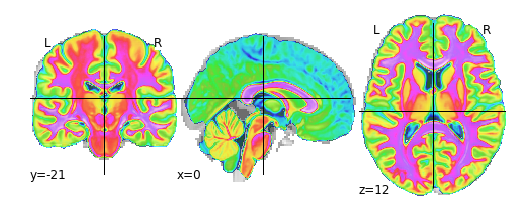

In [10]:
plotting.plot_roi('/data/henry6/PBR/templates/OASIS-30_Atropos_template_in_MNI152.nii.gz')

/data/henry7/software/anaconda/envs/anisha/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


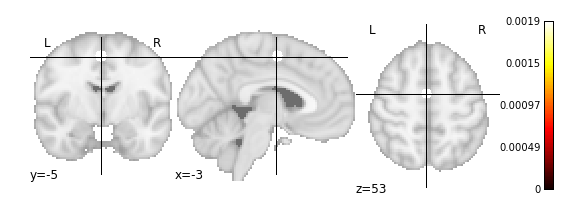

In [11]:
plotting.plot_stat_map('/data/henry7/imagery/piloting/surfaces/resting_state_ROI/SMA_ROI/SMA_lh_5mm.nii.gz')

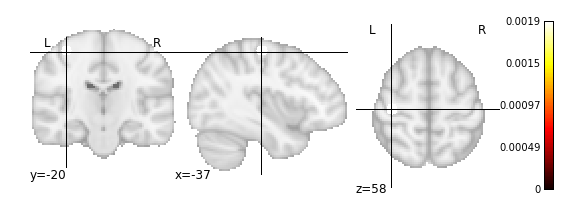

In [12]:
plotting.plot_stat_map('/data/henry7/imagery/piloting/surfaces/resting_state_ROI/M1_ROI/M1_lh.nii.gz')

In [13]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img='/data/henry6/PBR/templates/OASIS-30_Atropos_template_in_MNI152.nii.gz', standardize=True)

In [14]:
sub_id =["s05",
         "s07", "s08",
         "s09", "s10", "s11",
         "s12", "s13", "s14", "s15",
         "s16", "s17", "s18",
         "s19", "s20", "s21", "s22",
         "s23", "s24", "s25"]

In [15]:
SMA_file = '/data/henry7/imagery/piloting/surfaces/resting_state_ROI/SMA_ROI/SMA_lh_5mm.nii.gz'

In [18]:
SMA_coord = [(3, -12, 69)]
SMA_label = ['SMA']

In [127]:
masker = input_data.NiftiSpheresMasker(
    coords, radius=5,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.5,
    memory='nilearn_cache', memory_level=1, verbose=2)

In [19]:
from sklearn.covariance import LedoitWolf

In [21]:
def time_series(s):
    func_filename = '/data/henry7/imagery/piloting/resting/'+s+'/resting/timeseries/target/rest_01_smooth_trans_masked.nii.gz'
    confound_filename = '/data/henry7/imagery/piloting/resting/'+s+'/resting/regress/filter_regressor00.txt'

    time_series = masker.fit_transform(func_filename,
                                   confounds=[confound_filename])
    
    cve = LedoitWolf()
    cve.fit(time_series)
    
for time_serie, SMA_label in zip(time_series.T, SMA_label):
    print s, time_serie

MemoryError: 

In [130]:

cve = LedoitWolf()
cve.fit(time_series)


LedoitWolf(assume_centered=False, block_size=1000, store_precision=True)

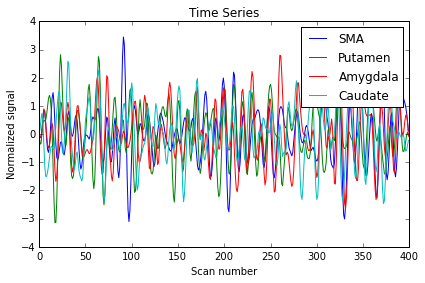

In [132]:
# Display time series
for time_serie, label in zip(time_series.T, labels):
    plt.plot(time_serie, label=label)

plt.title('Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.legend()
plt.tight_layout()

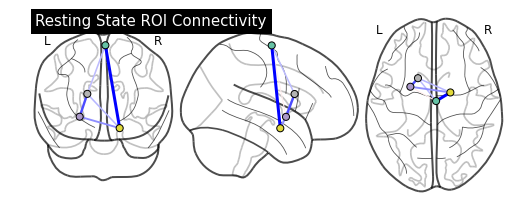

In [134]:
# Display connectome
title = "Resting State ROI Connectivity"
plotting.plot_connectome(cve.precision_, coords, title=title)
plotting.show()

In [147]:
for time_serie, label in zip(time_series.T, labels[0]):
    print time_serie

[ 0.02 -0.6  -0.91 -0.91 -0.8  -0.77 -0.87 -1.1  -1.34 -1.37 -0.96 -0.06
  1.1   2.12  2.61  2.4   1.6   0.5  -0.54 -1.21 -1.26 -0.7   0.14  0.81
  1.04  0.79  0.17 -0.55 -1.02 -1.02 -0.62 -0.12  0.17  0.13 -0.16 -0.47
 -0.51 -0.19  0.39  0.93  1.12  0.83  0.1  -0.82 -1.61 -1.97 -1.78 -1.13
 -0.17  0.78  1.33  1.28  0.84  0.37  0.08  0.04  0.26  0.64  1.01  1.22
  1.15  0.83  0.4  -0.01 -0.32 -0.52 -0.61 -0.67 -0.78 -0.88 -0.86 -0.69
 -0.42 -0.11  0.2   0.31  0.06 -0.46 -0.99 -1.25 -1.08 -0.49  0.4   1.31
  1.89  1.92  1.4   0.61 -0.13 -0.6  -0.67 -0.33  0.3   0.91  1.2   1.
  0.36 -0.53 -1.35 -1.82 -1.84 -1.49 -0.91 -0.25  0.38  0.88  1.22  1.37
  1.32  1.12  0.74  0.21 -0.38 -0.88 -1.17 -1.22 -0.99 -0.52  0.08  0.63
  0.93  0.83  0.41 -0.09 -0.44 -0.6  -0.59 -0.45 -0.25 -0.04  0.2   0.47
  0.64  0.6   0.47  0.45  0.51  0.44  0.09 -0.39 -0.66 -0.52 -0.04  0.54
  0.93  0.92  0.42 -0.41 -1.29 -1.86 -1.87 -1.23 -0.17  0.82  1.31  1.19
  0.6  -0.29 -1.1  -1.37 -0.89  0.08  1.09  1.78  1.9

In [149]:
for i in time_serie, label in zip(time_series.T, labels):
    print i

[ 0.01  0.26  0.43  0.56  0.75  0.94  0.94  0.63  0.12 -0.34 -0.51 -0.32
  0.11  0.53  0.75  0.69  0.33 -0.23 -0.74 -0.91 -0.66 -0.1   0.51  0.91
  0.92  0.48 -0.28 -1.11 -1.74 -1.93 -1.56 -0.76  0.17  0.91  1.3   1.36
  1.18  0.86  0.48  0.1  -0.26 -0.6  -0.87 -1.02 -0.99 -0.78 -0.42  0.04
  0.5   0.83  0.95  0.83  0.58  0.33  0.18  0.13  0.11  0.13  0.17  0.18
  0.13  0.07  0.1   0.23  0.36  0.36  0.12 -0.38 -0.99 -1.57 -1.98 -2.08
 -1.73 -0.92  0.14  1.05  1.51  1.44  0.95  0.27 -0.38 -0.73 -0.62 -0.05
  0.76  1.49  1.9   1.87  1.42  0.66 -0.23 -1.02 -1.51 -1.6  -1.34 -0.86
 -0.36  0.05  0.27  0.3   0.19  0.04 -0.13 -0.22 -0.13  0.15  0.49  0.72
  0.75  0.65  0.42  0.05 -0.42 -0.87 -1.19 -1.35 -1.35 -1.19 -0.83 -0.33
  0.21  0.71  1.14  1.48  1.63  1.6   1.45  1.26  0.94  0.45 -0.15 -0.79
 -1.4  -1.87 -2.04 -1.86 -1.44 -0.96 -0.49 -0.1   0.23  0.56  0.95  1.38
  1.69  1.76  1.55  1.1   0.44 -0.29 -0.88 -1.13 -0.97 -0.5   0.11  0.64
  0.81  0.53 -0.   -0.61 -1.22 -1.79 -2.16 -2.17 -1